[numpy.random.multivariate_normal](https://numpy.org/devdocs/reference/random/generated/numpy.random.multivariate_normal.html)

[numpy.vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)

dimension of x1 = x2 = (5000, 2)
dimension of input (10000, 3)
dimension of output (10000,)


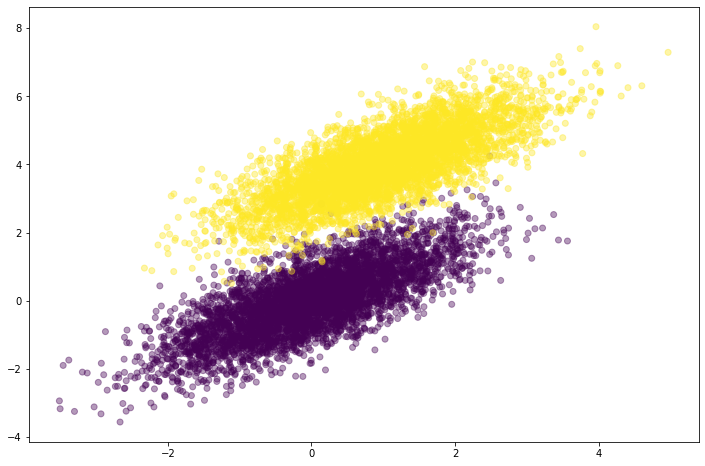

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
si = 5000     #size of the data set we are creating


x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], si)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], si)

print("dimension of x1 = x2 =",x1.shape)

sfeature=np.vstack((x1, x2)).astype(np.float32)     #concatinates axis 0

plt.figure(figsize=(12,8))
plt.scatter(sfeature[:, 0], sfeature[:, 1], c = slabel, alpha = .4)


intercept = np.ones((sfeature.shape[0], 1))       #assuming all the intercept to be one (we are creating this example)
sfeature = np.hstack((intercept, sfeature))        #concatinates axis 1

slabel=np.hstack((np.zeros(si), np.ones(si)))       
print("dimension of input",sfeature.shape)
print("dimension of output",slabel.shape)

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

The log-likelihood can be viewed as as sum over all the training data. Mathematically,

$$\begin{equation}
ll = \sum_{i=1}^{N}y_{i}\beta ^{T}x_{i} - log(1+e^{\beta^{T}x_{i}})
\end{equation}$$
where $y$ is the target class, $x_{i}$ represents an individual data point, and $\beta$ is the weights vector.




[Derivative of cost function reference](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)

The gradient:

$$\begin{equation}
\bigtriangledown ll = X^{T}(Y - Predictions)
\end{equation}$$

In [47]:

def logistic_regression(features, target, num_steps, learning_rate):
    no_w=features.shape[1]      #in this case its 3
    weights = np.zeros(no_w)
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
    return weights

In [48]:

weights = logistic_regression(sfeature, slabel,
                     num_steps = 300000, learning_rate = 5e-5)

[Regerence to sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


sk-learn's LogisticRegression automatically regularizes which we are not doing in our example we are setting C to a very large value to kind of turn off the regularization

In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=False, C = 1e20)
clf.fit(sfeature, slabel)

#print(clf.intercept_, clf.coef_)
print(clf.coef_)
print(weights)

[[-12.16580792  -4.39438377   7.09704349]]
[-12.16580758  -4.39438313   7.09704312]


In [55]:
final_scores = np.dot(sfeature, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == slabel).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clf.score(sfeature, slabel)))

Accuracy from scratch: 0.9936
Accuracy from sk-learn: 0.9936


References I have used:

[towardsdatascience](https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a)

[medium](https://medium.com/@apoorvkhare500/logistic-regression-a-complete-guide-587e25af315b)

https://github.com/arnaldog12/Machine_Learning/blob/master/Regress%C3%A3o%20Log%C3%ADstica.ipynb